## Loading and Cleaning data

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#Loading the CSV file
df = pd.read_csv('./Boston.csv')

In [35]:
df.head()

crim    zn  indus chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31   No  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   No  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   No  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   No  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   No  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

## Encoding the categorical variable ```chas```

- Now as we can see that our dataset contains categorical variable 'chas'
- We have to encode that variable inorder to apply linear regression

Using pandas ```replace()``` function

creating a custom dictionary for mapping as our chas variable conatins only two parameters ```Yes``` and ```No```

In [43]:
replace_map ={
    "chas" : {
        'No': 0,
        'Yes' : 1
    }
}

In [45]:
df.replace(replace_map, inplace = True)

In [47]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [57]:
X = df.values[:, :-1]
df_x = pd.DataFrame(X)
df_x.columns = df.columns[:-1]
df_x.head()

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   ptratio   black  lstat  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [63]:
y = df.values[:, -1]
df_y = pd.DataFrame(y)
df_y.columns = df.columns[-1:]
df_y.head()

medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

## Splitting the data for Training and Testing

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [65]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

- From above we can see that this data is not Normalised
- So, we need to Normalise the data so that it has unity mean and std = 1

In [66]:
u = np.mean(X, axis = 0) # AXIS = 0 tells us to find mean along rows
std = np.std(X, axis =0)
#print(u.shape, std.shape)

In [67]:
X = (X-u)/std

In [68]:
#Normalised Data
pd.DataFrame(X).head(n=5)

0         1         2         3         4         5         6   \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         7         8         9         10        11        12  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

    ### Data Visualization

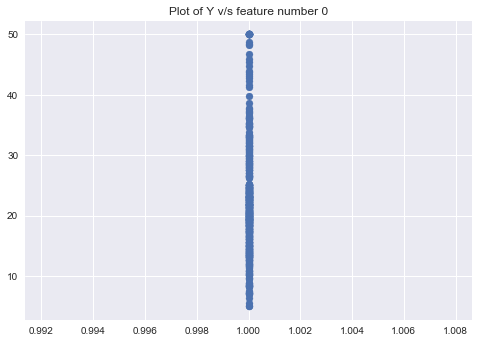

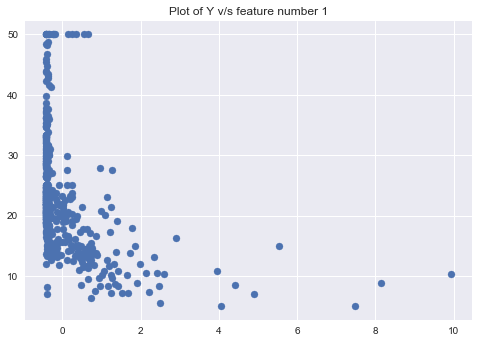

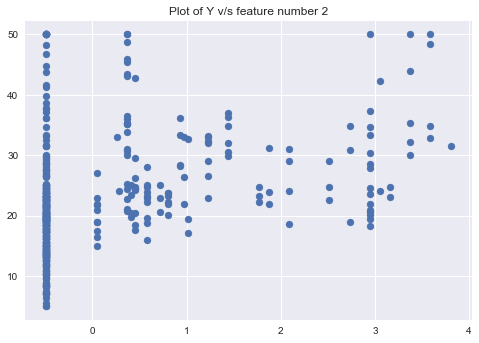

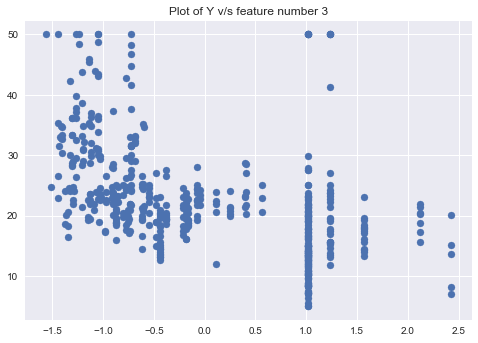

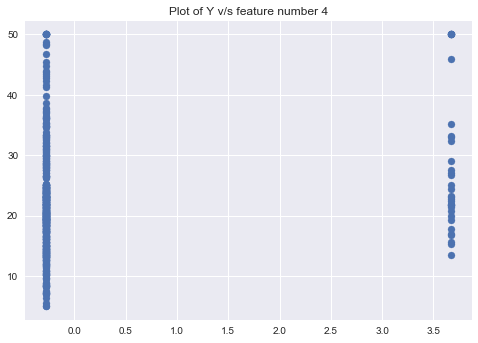

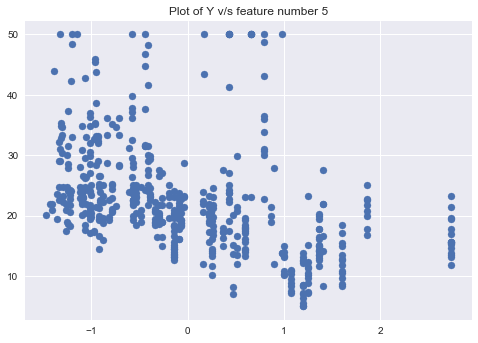

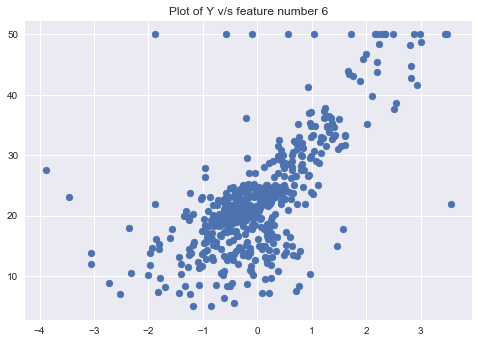

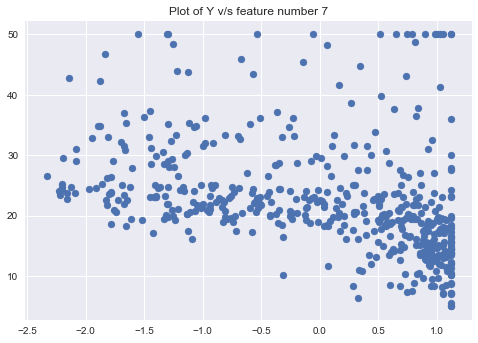

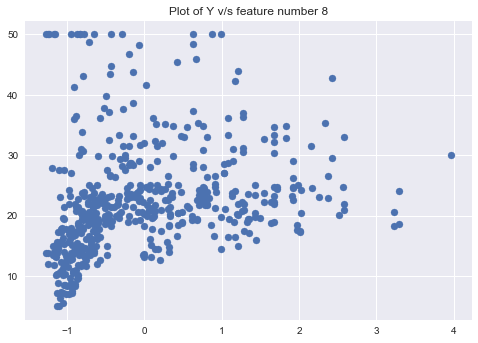

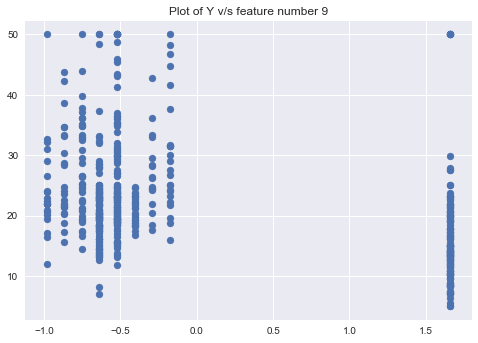

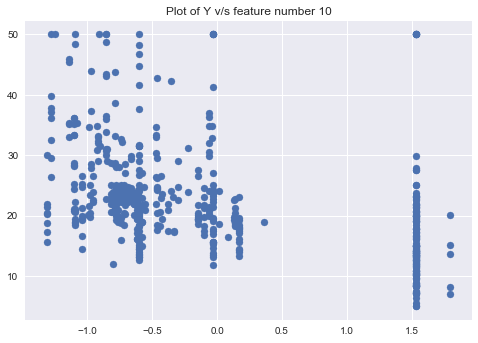

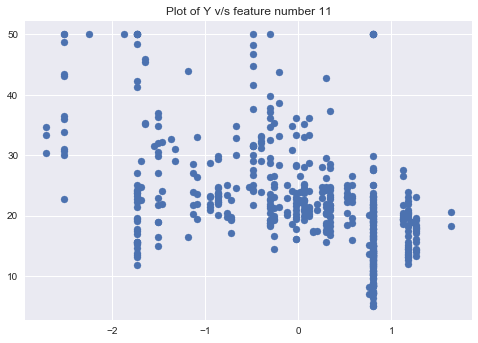

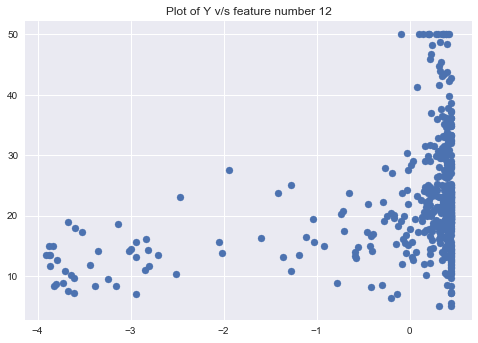

In [125]:
#Plot y vs any one feature
#So, lets say Y vs 5th feature
plt.style.use('seaborn')
import matplotlib.pyplot as plt
for i in range(13):
    plt.scatter(X[:,i], y)
    plt.title('Plot of Y v/s feature number ' + str(i))
    plt.show()

# Applying Linear Regression on this dataset with Multiple features

In [70]:
X.shape, y.shape

((506, 13), (506,))

In [71]:
#Adding X0 col at the 0th position in the X matrix
ones = np.ones((X.shape[0], 1))
X =np.hstack((ones,X))
#pd.DataFrame(X).head()
print(X.shape)

(506, 14)


In [72]:
pd.DataFrame(X).head()

0         1         2         3         4         5         6         7   \
0  1.0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1  1.0 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2  1.0 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3  1.0 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4  1.0 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         8         9         10        11        12        13  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

In [104]:
m,n = X.shape
def hypothesis(X, theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e =0.0
    y_ =hypothesis(X,theta)
    e = np.sum((y - y_)**2)
    return e/m

def gradient(X,y, theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T, (y_ -y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X,y, learning_rate=0.1, max_epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list =[]
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        #gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta, error_list

In [105]:
import time
start = time.time()
theta, error_list = gradient_descent(X_train,y_train)
end = time.time()
print("time taken by our code: " ,end-start)

time taken by our code:  0.013958454132080078


### Train Error

In [117]:
train_error = error(X_train, y_train, theta)
print(train_error)

13.511615563168027


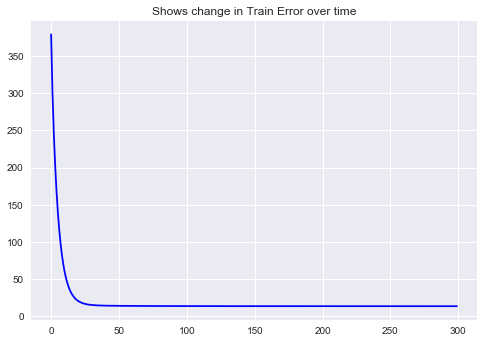

In [106]:
plt.plot(error_list, color ='blue')
plt.title('Shows change in Train Error over time')
plt.show()

## Making predictions on Test data

In [107]:
theta_test, test_error_list = gradient_descent(X_test,y_test)

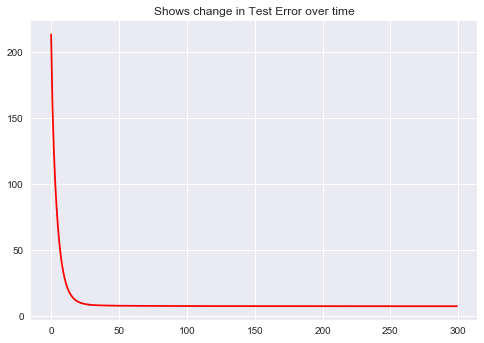

In [108]:
plt.plot(test_error_list, color = 'red')
plt.title('Shows change in Test Error over time')
plt.show()

R2 score

In [109]:
def r2_score(y,y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [118]:
# Predictions

y_ = hypothesis(X_test, theta_test)
r2_score(y_test, y_)

76.91395556255317

In [103]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     39.36
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           3.85e-42
Time:                        04:12:36   Log-Likelihood:                -495.09
No. Observations:                 167   AIC:                             1018.
Df Residuals:                     153   BIC:                             1062.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6713      0.390     58.112      0.0

### RMSE

In [112]:
RMSE = error(X_test, y_test, theta_test)
print(RMSE)

7.284189105756502


### Additon of Coefficients

In [115]:
addition_of_coefficients = np.sum(theta_test)
print(addition_of_coefficients)

15.677324488852367
